In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as s
import statsmodels.formula.api as sm
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression

# Problem 1

In [2]:
tb1 = pd.read_excel("D:/Programming/Data analytics/static/Week 7/Week 7 (Important Data)-20220714T173612Z-001/Week 7 (Important Data)/dummy.xlsx")
tb1

,servicecall,months_since_last_service,type_of_repair,repair_time_in_hours
0,1,2,electrical,2.9
1,2,6,mechanical,3.0
2,3,8,electrical,4.8
3,4,3,mechanical,1.8
4,5,2,electrical,2.9
5,6,7,electrical,4.9
6,7,9,mechanical,4.2
7,8,8,mechanical,4.8
8,9,4,electrical,4.4
9,10,6,electrical,4.5


Text(0.5, 1.0, 'Simple Linear Regression')

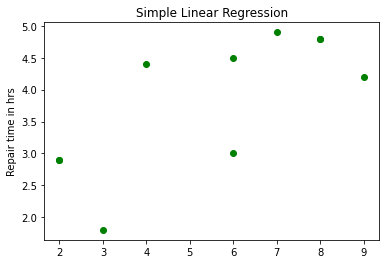

In [3]:
plt.scatter(tb1['months_since_last_service'], tb1['repair_time_in_hours'], color = 'green')
plt.ylabel('Repair time in hrs')
plt.title("Simple Linear Regression")

In [4]:
Reg = sm.ols('repair_time_in_hours ~ months_since_last_service', data = tb1)
Fit1 = Reg.fit()
print(Fit1.summary())

                             OLS Regression Results                             
Dep. Variable:     repair_time_in_hours   R-squared:                       0.534
Model:                              OLS   Adj. R-squared:                  0.476
Method:                   Least Squares   F-statistic:                     9.174
Date:                  Thu, 21 Jul 2022   Prob (F-statistic):             0.0163
Time:                          20:39:08   Log-Likelihood:                -10.602
No. Observations:                    10   AIC:                             25.20
Df Residuals:                         8   BIC:                             25.81
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
In

c:\Users\SOUMYAPANJA\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


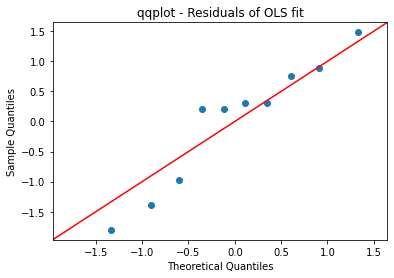

In [5]:
res = Fit1.resid # residuals
probplot = s.ProbPlot(res, stats.norm, fit = True)
fig = probplot.qqplot(line = '45')
h = plt.title("qqplot - Residuals of OLS fit")
plt.show()

In [6]:
just_dummies = pd.get_dummies(tb1['type_of_repair'])
just_dummies

,electrical,mechanical
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
5,1,0
6,0,1
7,0,1
8,1,0
9,1,0


In [7]:
step_1 = pd.concat([tb1, just_dummies], axis = 1)
step_1

,servicecall,months_since_last_service,type_of_repair,repair_time_in_hours,electrical,mechanical
0,1,2,electrical,2.9,1,0
1,2,6,mechanical,3.0,0,1
2,3,8,electrical,4.8,1,0
3,4,3,mechanical,1.8,0,1
4,5,2,electrical,2.9,1,0
5,6,7,electrical,4.9,1,0
6,7,9,mechanical,4.2,0,1
7,8,8,mechanical,4.8,0,1
8,9,4,electrical,4.4,1,0
9,10,6,electrical,4.5,1,0


In [8]:
step_1.drop(['type_of_repair', 'mechanical'], inplace = True, axis = 1)
step_1

,servicecall,months_since_last_service,repair_time_in_hours,electrical
0,1,2,2.9,1
1,2,6,3.0,0
2,3,8,4.8,1
3,4,3,1.8,0
4,5,2,2.9,1
5,6,7,4.9,1
6,7,9,4.2,0
7,8,8,4.8,0
8,9,4,4.4,1
9,10,6,4.5,1


In [9]:
result = s.OLS(step_1['repair_time_in_hours'], s.add_constant(step_1[['months_since_last_service', 'electrical']])).fit()
print(result.summary())

                             OLS Regression Results                             
Dep. Variable:     repair_time_in_hours   R-squared:                       0.859
Model:                              OLS   Adj. R-squared:                  0.819
Method:                   Least Squares   F-statistic:                     21.36
Date:                  Thu, 21 Jul 2022   Prob (F-statistic):            0.00105
Time:                          20:39:09   Log-Likelihood:                -4.6200
No. Observations:                    10   AIC:                             15.24
Df Residuals:                         7   BIC:                             16.15
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
co

c:\Users\SOUMYAPANJA\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# Problem 2

In [10]:
tb2 = pd.read_excel("D:/Programming/Data analytics/static/Week 7/Week 7 (Important Data)-20220714T173612Z-001/Week 7 (Important Data)/dummy2.xlsx")
tb2

,Employee,Salary,Gender,Experience
0,1,7.5,Male,6
1,2,8.6,Male,10
2,3,9.1,Male,12
3,4,10.3,Male,18
4,5,13.0,Male,30
5,6,6.2,Female,5
6,7,8.7,Female,13
7,8,9.4,Female,15
8,9,9.8,Female,21


Text(0.5, 1.0, 'Simple Linear Regression')

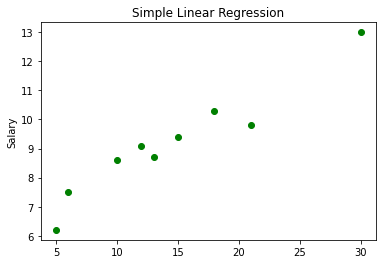

In [11]:
plt.scatter(tb2['Experience'], tb2['Salary'], color = "green")
plt.ylabel("Salary")
plt.title("Simple Linear Regression")

In [12]:
Reg2 = sm.ols(formula='Salary ~ Experience', data=tb2)
Fit2 = Reg2.fit()
print(Fit2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     87.61
Date:                Thu, 21 Jul 2022   Prob (F-statistic):           3.30e-05
Time:                        20:39:09   Log-Likelihood:                -6.2491
No. Observations:                   9   AIC:                             16.50
Df Residuals:                       7   BIC:                             16.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8093      0.404     14.386      0.0

c:\Users\SOUMYAPANJA\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [13]:
influence = Fit2.get_influence()
resid_student = influence.resid_studentized_external

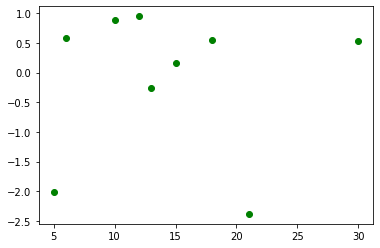

In [14]:
plt.figure()
plt.scatter(tb2['Experience'], resid_student, color = "green")

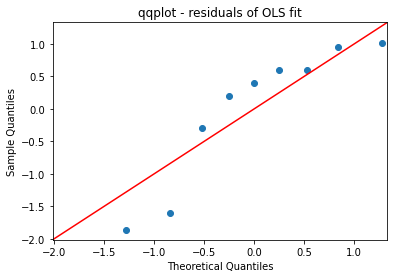

In [15]:
res2 = Fit2.resid # residuals
probplot2 = s.ProbPlot(res2, stats.norm, fit = True)
fig = probplot2.qqplot(line = '45')
h = plt.title('qqplot - residuals of OLS fit')
plt.show()

In [16]:
just_dummies2 = pd.get_dummies(tb2['Gender'])
just_dummies2

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,1,0
6,1,0
7,1,0
8,1,0


In [23]:
step_1_2 = pd.concat([tb2, just_dummies2], axis = 1)
step_1_2.drop(['Gender', 'Male'], inplace = True, axis = 1)

In [24]:
result2 = s.OLS(step_1_2['Salary'], s.add_constant(step_1_2['Female'])).fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.8426
Date:                Thu, 21 Jul 2022   Prob (F-statistic):              0.389
Time:                        20:43:08   Log-Likelihood:                -17.455
No. Observations:                   9   AIC:                             38.91
Df Residuals:                       7   BIC:                             39.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7000      0.853     11.367      0.0

c:\Users\SOUMYAPANJA\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [26]:
result3 = s.OLS(step_1_2['Salary'], s.add_constant(step_1_2[['Experience', 'Female']])).fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     111.6
Date:                Thu, 21 Jul 2022   Prob (F-statistic):           1.80e-05
Time:                        20:48:59   Log-Likelihood:                -1.5752
No. Observations:                   9   AIC:                             9.150
Df Residuals:                       6   BIC:                             9.742
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2485      0.291     21.439      0.0

c:\Users\SOUMYAPANJA\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### If included male

In [30]:
step_1_3 = pd.concat([tb2, just_dummies2], axis = 1)
step_1_3.drop(['Gender', 'Female'], inplace = True, axis = 1)

# Including Male instead of female will not change the inferences. It only changes the sign of coefficinent

result3 = s.OLS(step_1_3['Salary'], s.add_constant(step_1_3[['Experience', 'Male']])).fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     111.6
Date:                Thu, 21 Jul 2022   Prob (F-statistic):           1.80e-05
Time:                        21:03:01   Log-Likelihood:                -1.5752
No. Observations:                   9   AIC:                             9.150
Df Residuals:                       6   BIC:                             9.742
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4595      0.280     19.486      0.0

c:\Users\SOUMYAPANJA\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
